# Digital Signal Proccesing on Audio Tracks

In [1]:
# !pip install seaborn --upgrade
# !pip freeze | grep seaborn
# import sys
# sys.path.append("/path/to/module")


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [3]:
import matplotlib.style as style 

style.use('ggplot')
sns.set_context('notebook')
cmap = 'RdYlGn'
sns.set_palette(cmap)

In [4]:
import struct
from glob import glob
import librosa as lr
import librosa.display

In [5]:
from mpl_toolkits.mplot3d import axes3d
import IPython.display as ipd

%matplotlib inline

In [6]:
audio_path = 'clips_compiled.wav'

In [7]:
audio, sfreq = lr.load(audio_path)
time = np.arange(0, len(audio)) / sfreq
print(f'audio: {audio.shape}\ntime: {time.shape}\nsfreq: {sfreq}')

audio: (793800,)
time: (793800,)
sfreq: 22050


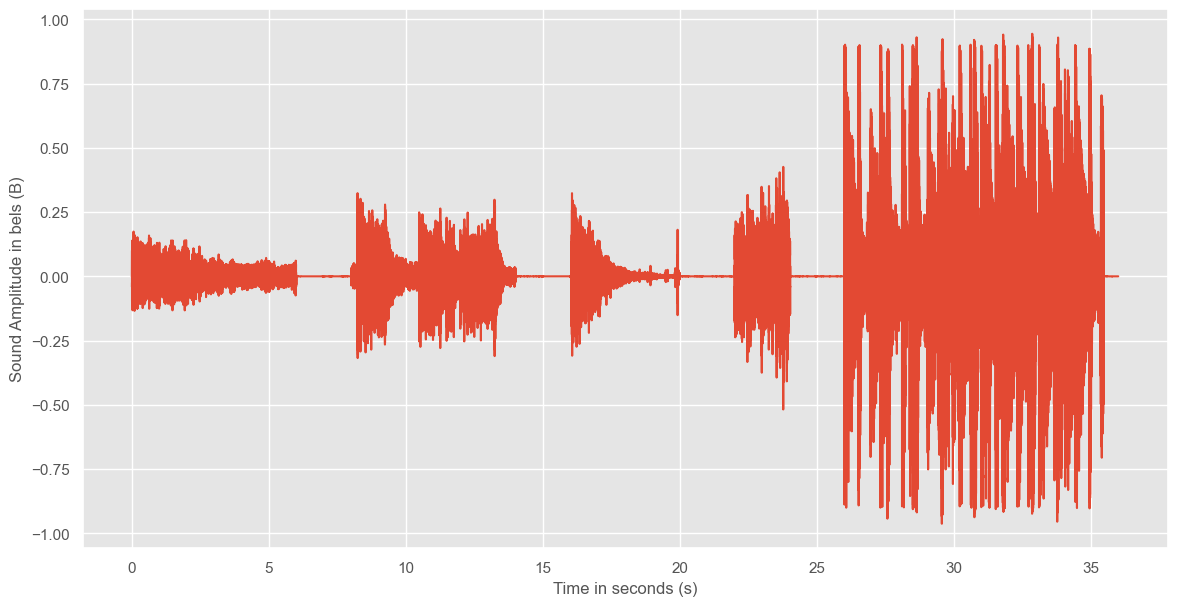

In [8]:
_, ax = plt.subplots(figsize=(14,7))
ax.plot(time, audio)
ax.set(xlabel='Time in seconds (s)', ylabel='Sound Amplitude in bels (B)')
plt.show()

In [9]:
ipd.Audio(audio_path)

Text(117.49999999999999, 0.5, 'Amplitude (B)')

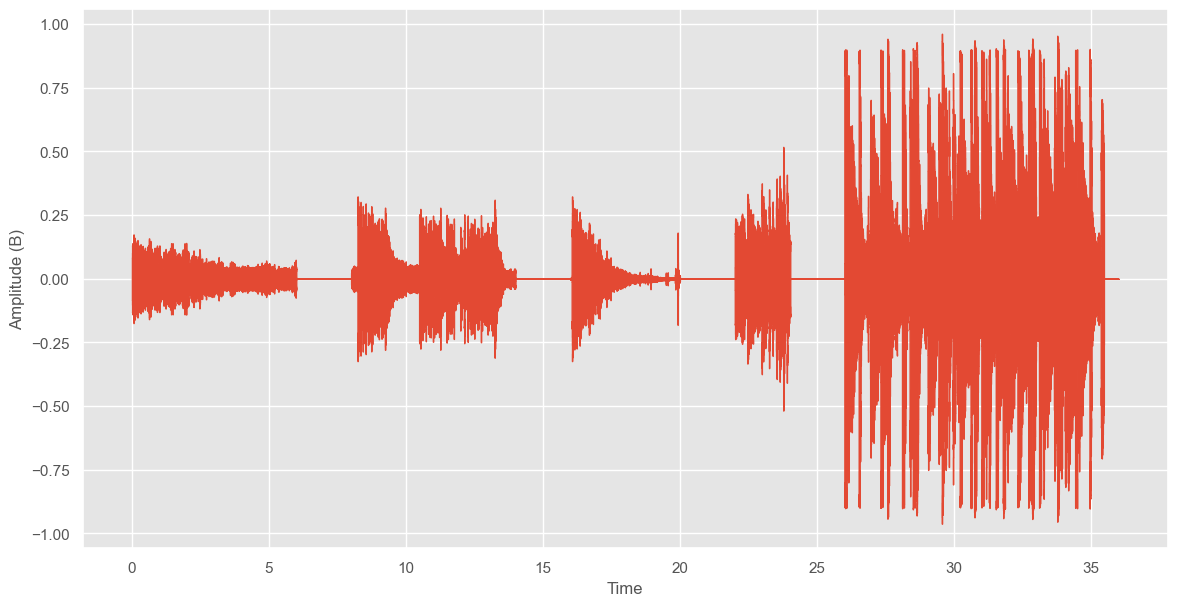

In [10]:
plt.figure(figsize=(14,7))
lr.display.waveshow(audio, sr=sfreq)
plt.ylabel('Amplitude (B)')

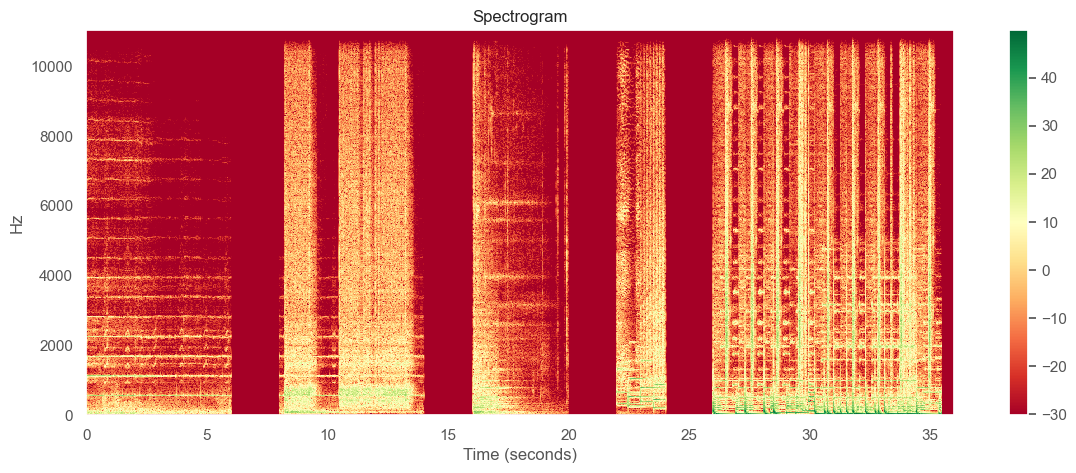

In [11]:
#display Spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sfreq, x_axis='s', y_axis='hz', cmap=cmap) 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram')
plt.colorbar()
plt.show()

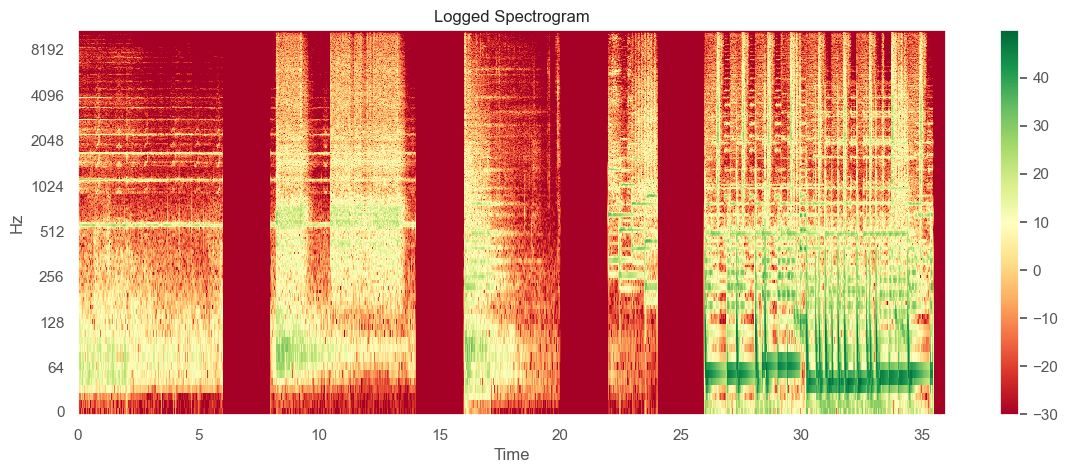

In [12]:
#display Spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sfreq, x_axis='time', y_axis='hz', cmap=cmap) 
#If to pring log of frequencies  
librosa.display.specshow(Xdb, sr=sfreq, x_axis='time', y_axis='log', cmap=cmap)
plt.title('Logged Spectrogram')
plt.colorbar()
plt.show()

___
___
### Individual clip analysis

In [13]:
clips = [x for x in glob('./audio_files/*.wav')]

In [14]:
amp, sr = lr.load(clips[-1])

/Users/dom/Repos/DSP_Songs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  


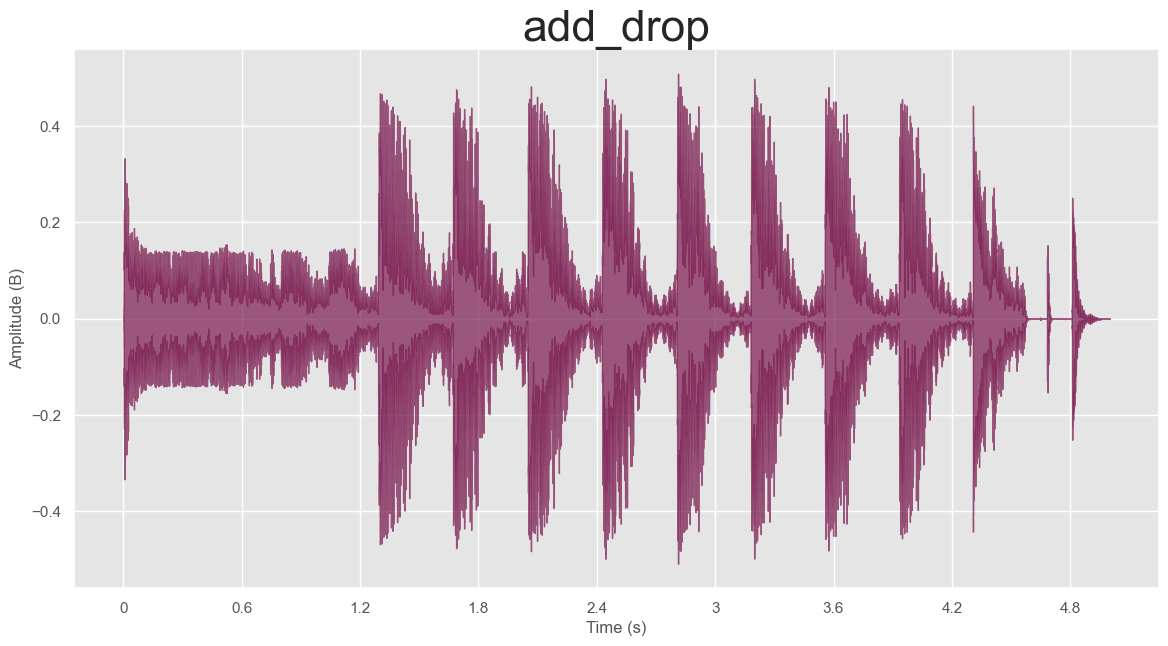

In [15]:
plt.figure(figsize=(14,7))
lr.display.waveshow(amp, sr=sr, alpha=0.7, color='#7a1b4f', x_axis='s')
plt.ylabel('Amplitude (B)')
plt.xlabel('Time (s)')
plt.title(clips[-1].split('/')[-1][:-4], fontsize=32)

ipd.Audio(clips[-1])

In [16]:
clips

['./audio_files/loyal_drum.wav',
 './audio_files/steele_pura_drum.wav',
 './audio_files/steele_pura_bells.wav',
 './audio_files/loyal_horn.wav',
 './audio_files/steele_pura_beat.wav',
 './audio_files/add_drop.wav']

/Users/dom/Repos/DSP_Songs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  


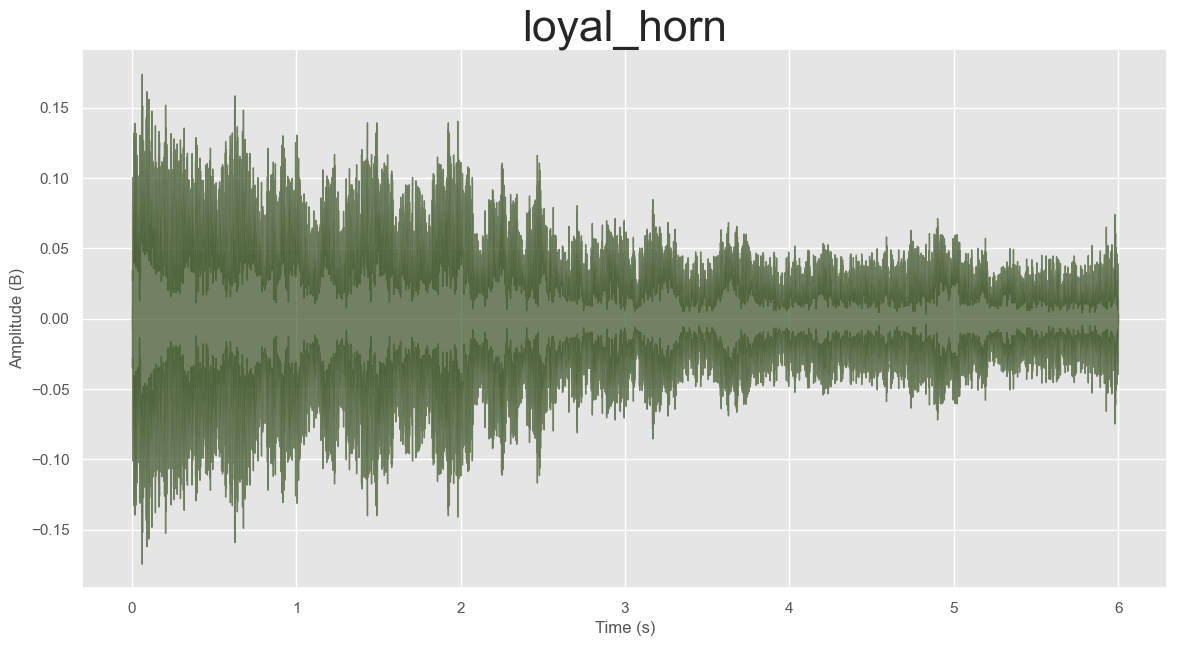

In [17]:
track = clips[3]

amp, sr = lr.load(track)

plt.figure(figsize=(14,7))
lr.display.waveshow(amp, sr=sr, alpha=0.7, color='#40572b', x_axis='s')
plt.ylabel('Amplitude (B)')
plt.xlabel('Time (s)')
plt.title(track.split('/')[-1][:-4], fontsize=32)

ipd.Audio(track)

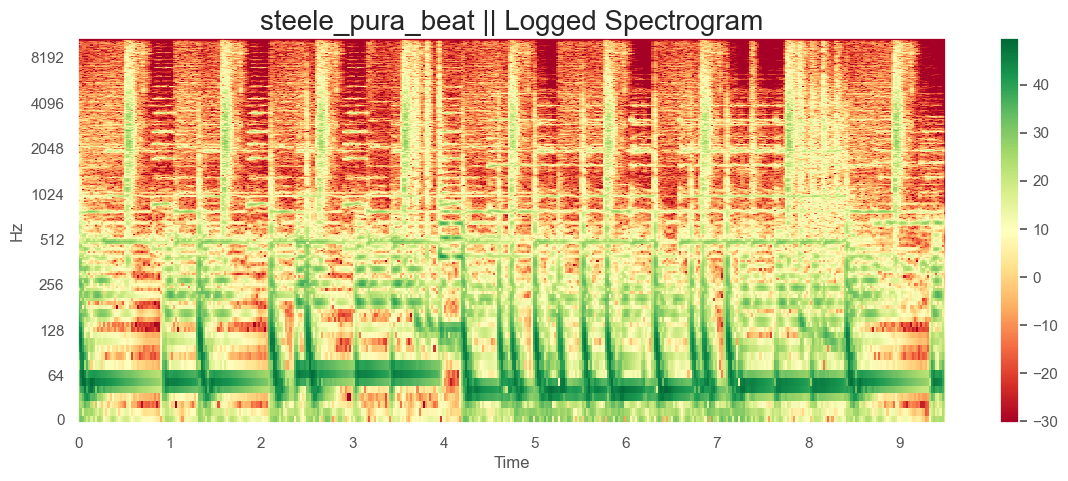

In [18]:
track = clips[-2]

amp, sr = lr.load(track)

#display Spectrogram
X = librosa.stft(amp)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sfreq, x_axis='time', y_axis='hz', cmap=cmap) 
#If to pring log of frequencies  
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', cmap=cmap)
plt.title(track.split('/')[-1][:-4] + ' || Logged Spectrogram', fontsize=20)
plt.colorbar()
plt.show()

/Users/dom/Repos/DSP_Songs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  


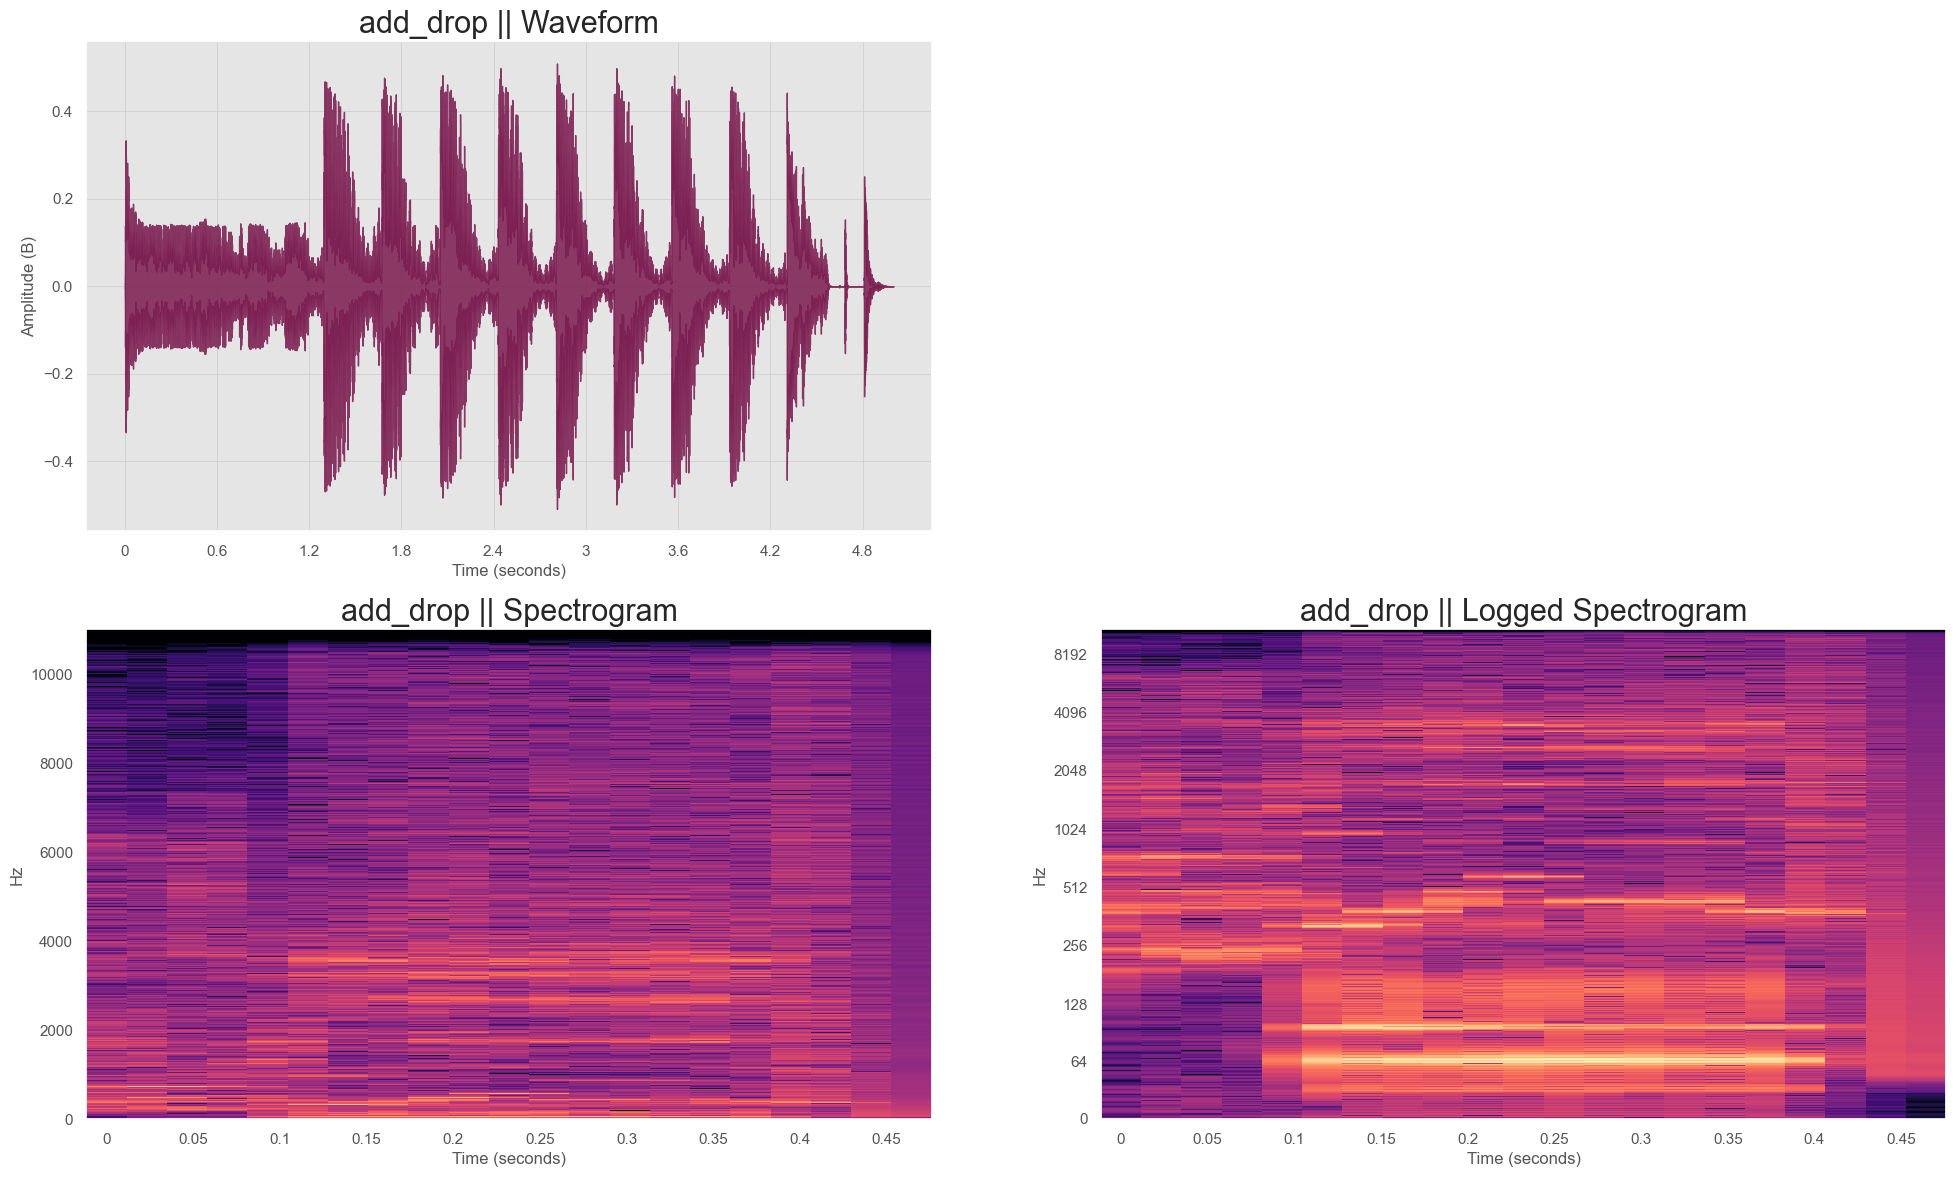

In [19]:
track = clips[-1]

amp, sr = lr.load(track)

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,14))
lr.display.waveshow(amp, sr=sr, alpha=0.85, color='#7a1b4f', x_axis='s', ax=ax[0,0])
ax[0,0].set_ylabel('Amplitude (B)')
# ax1.set_xlabel('Time (s)')
ax[0,0].set_title(track.split('/')[-1][:-4] + ' || Waveform', fontsize=22)
ax[0,0].grid(linestyle='-', linewidth='0.5', color='#cccccc')


X = librosa.stft(amp)  # , n_fft=)
Xdb = librosa.amplitude_to_db(abs(X))

librosa.display.specshow(Xdb, sr=sr, x_axis='s', y_axis='hz', cmap='magma', ax=ax[1,0]) 
#If to pring log of frequencies  
ax[1,0].set_title(track.split('/')[-1][:-4] + ' || Spectrogram', fontsize=22)

# plt.colorbar()
ax[1,0].grid(linestyle='-', linewidth='0.5', color='#cccccc')

librosa.display.specshow(Xdb, sr=sr, x_axis='s', y_axis='log', cmap='magma', ax=ax[1,1])
ax[1,1].set_title(track.split('/')[-1][:-4] + ' || Logged Spectrogram', fontsize=22)

ax[0,1].set_visible(False)
ipd.Audio(track)

In [61]:
X.shape

(11026, 21)

In [20]:
sr

22050

In [86]:
np.hstack((ty, tz)).shape

(22050,)

In [82]:
ty, tz = np.arange(0, sr/2), np.arange(0, sr/2)
x = np.vstack((ty, tz))
x = x.reshape((-1, 2))

In [84]:
x[0]

array([0., 1.])

In [92]:
ty, tz = np.arange(0, sr/2), np.arange(0, sr/2)
Xtime = np.arange(0, sr)
YHz = X[:-1]
ZdB = Xdb[:-1]
print(f'Xtime: {Xtime.shape}\nFrequency (Hz): {YHz.shape}\nAmplitude (decibels): {ZdB.shape}')
result = bool(sr/YHz.shape[0] and sr/ZdB.shape[1])
print(f'Lengths pass broadcasting: {result}')

Xtime: (22050,)
Frequency (Hz): (11025, 21)
Amplitude (decibels): (11025, 21)
Lengths pass broadcasting: True


In [98]:
YHz[:].shape

(11025, 21)

In [101]:
y = np.moveaxis(YHz, 0, 1)
y = y[:-1]
y = np.moveaxis(y, 0, 1)
y.shape

(11025, 20)

In [102]:
z = np.moveaxis(ZdB, 0, 1)
z = z[:-1]
z = np.moveaxis(z, 0, 1)
z.shape

(11025, 20)

In [60]:
amp.shape

(110250,)

In [41]:
Xdb[:-1].shape

(11025, 21)

In [24]:
# Xdb[0]
Xdb.shape
Z = np.reshape(X, (-1,))
Z.shape

(231546,)

In [55]:
lr.time_to_frames(Xdb[0], sr=sr).shape

(21,)

In [56]:

Z.shape

(231546,)

In [93]:
lr.time_to_frames(Xtime, sr=sr).shape

(22050,)

In [94]:
Xtime

array([    0,     1,     2, ..., 22047, 22048, 22049])

In [59]:
amp.shape

(110250,)

In [58]:
# Zdb = librosa.amplitude_to_db(amp)
Zdb = librosa.amplitude_to_db(abs(Z))

In [ ]:
Xdb.shape
# Zdb.shape

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [54]:
print(f'time: {time.shape}\namp: {amp.shape}\ndB: {Zdb.shape}')

NameError: name 'Zdb' is not defined

In [ ]:
Xdb[1].shape
# time.shape
# np.array([Xdb[1], time]).shape

In [ ]:
sr

In [52]:
Xtime.reshape((2, -1)).shape

(2, 11025)

In [103]:
ty, tz = np.arange(0, sr/2), np.arange(0, sr/2)
x = np.vstack((ty, tz))
x = np.moveaxis(x, 0, 1)
x.shape

(11025, 2)

In [108]:
print(f'X: {x.shape}\tY: {y.shape}\tZ: {z.shape}')

X: (11025, 2)	Y: (11025, 20)	Z: (11025, 20)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

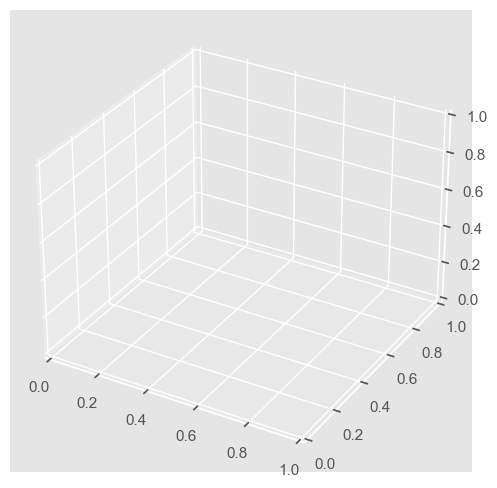

In [107]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
# Axes3D(0.05)
# ax.plot_surface(np.array(Xdb[0]), amp, np.array([Xdb[1], time[0]]), rstride=4, cstride=4)
# ax.plot3D(Zdb, amp, time, rstride=4, cstride=4)
ax.plot_surface(y, z, x, rstride=4, cstride=4)

plt.show()

In [ ]:
tmp = lr.fft_frequencies(sr=sr)
tmp.shape

In [ ]:
lr.amplitude_to_db(amp).shape